In [1]:
#Importing the required libraries and modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer, Normalizer, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

In [2]:
#Read that data into Python and call the dataframe churnData.
data = "DATA_Customer-Churn.csv"
churnData = pd.read_csv(data)
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
#Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. 
#Convert this column into numeric type using pd.to_numeric function.

churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors = "coerce")

# Check the updated data types
print(churnData.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [4]:
#Check for null values in the dataframe. Replace the null values.
print(churnData.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [5]:
#replace the null with the mean of the TotalCharges column
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(churnData["TotalCharges"].mean())
print(churnData.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
#display the DF
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


## Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
## Split the data into a training set and a test set.
## Scale the features either by using normalizer or a standard scaler.
## Fit a logistic Regression model on the training data.
## Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [7]:
# Display unique values in the "Churn" column before mapping
print("Unique values in 'Churn' column before mapping:", churnData["Churn"].unique())

# Map 'Yes' to 1 and 'No' to 0 in the 'Churn' column
churnData["Churn"] = churnData["Churn"].map({"Yes": 1, "No": 0})

# Display unique values in the "Churn" column after mapping
print("Unique values in 'Churn' column after mapping:", churnData["Churn"].unique())

Unique values in 'Churn' column before mapping: ['No' 'Yes']
Unique values in 'Churn' column after mapping: [0 1]


In [8]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
#Split the data into a training set and a test set.

selected_features = ["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]
X = churnData[selected_features]  # Features
y = churnData["Churn"]  # Target variable

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets to verify the split
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Test set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (5634, 4) (5634,)
Test set shape (X, y): (1409, 4) (1409,)


In [9]:
#Scale the features either by using normalizer or a standard scaler.

#Using Normalizer
normalizer = Normalizer()

# Fit the normalizer on the training data and transform both the training and test sets
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)

In [10]:
#Fit a logistic Regression model on the training data.

log_model = LogisticRegression() 

log_model.fit(X_train_scaled, y_train)

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.759496,0.762952
1,Precision,0.612440,0.602094
2,Recall,0.256684,0.308311


## Confusion matrices

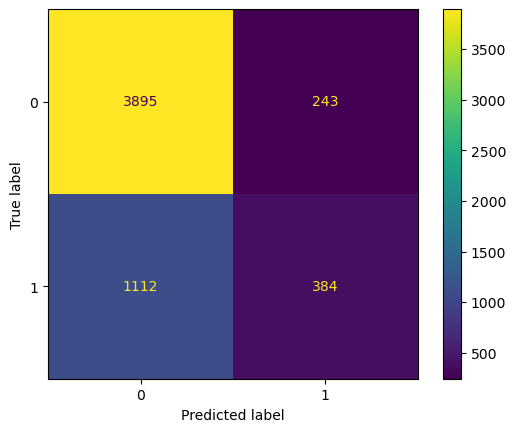

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

In [12]:
#Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.828541,0.783534
1,Precision,0.737030,0.617241
2,Recall,0.550802,0.479893


In [13]:
y_pred[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [14]:
y_test.head(5)

185     1
2715    0
3825    0
1807    1
132     0
Name: Churn, dtype: int64

## Confusion matrices

Confusion matrices allow us to visualize how the model performs by showing how the predicted labels compare with the true (test) labels. The false positives (upper right corners) and false negatives (lower left corners) impact the precision and recall scores.

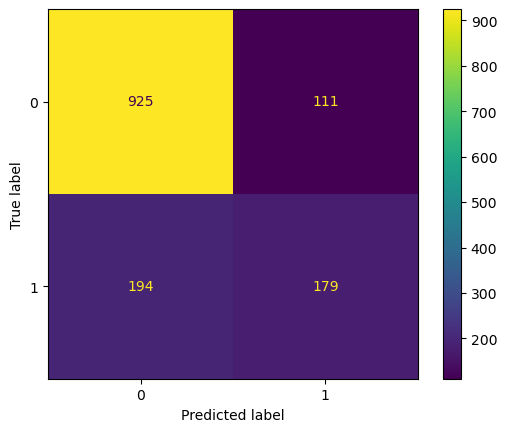

In [15]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()